In [1]:
import numpy as np
from sklearn import datasets 
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.cluster import pair_confusion_matrix

In [2]:
breast_cancer = datasets.load_breast_cancer()

In [3]:
scaler = StandardScaler()

In [4]:
X =  breast_cancer.data
X_scaled = scaler.fit_transform(breast_cancer.data)
y = breast_cancer.target
np.random.seed(15)

In [5]:
spec = SpectralClustering(n_clusters = 2, gamma=1, degree = 3, kernel_params=None, n_neighbors=10,n_init=10,affinity='rbf',eigen_solver=None)
##  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html#sklearn.cluster.SpectralClustering

In [6]:

ypred_normal = spec.fit_predict(X)
ypred_scaled = spec.fit_predict(X_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:233: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:372: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.p

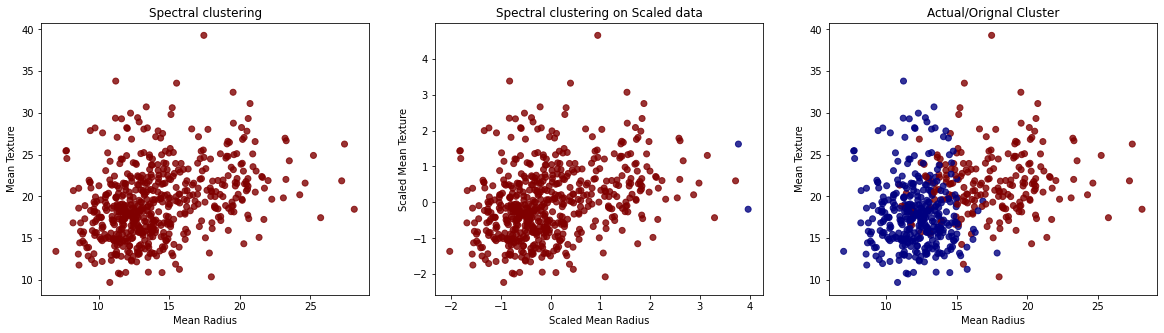

In [7]:
plt.figure(figsize=(20,5))
plt.subplot(131)
plt.scatter(X[:,0],X[:,1],  c=ypred_normal, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Spectral clustering')

plt.subplot(132)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=ypred_scaled, cmap = "jet_r",alpha=0.8)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Spectral clustering on Scaled data')

plt.subplot(133)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

In [8]:
estimators = [
    ("SC_2_lobpcg", SpectralClustering(n_clusters = 2,eigen_solver="lobpcg")),
    ("SC_2_arpack", SpectralClustering(n_clusters = 2,eigen_solver="arpack")),
    ("SC_2_affinity", SpectralClustering(n_clusters = 2,affinity="nearest_neighbors")),
    ("SC_2_eigen_affinity", SpectralClustering(n_clusters = 2,eigen_solver="lobpcg", affinity="nearest_neighbors")),
    ("SC_2_components", SpectralClustering(n_clusters = 2,n_components=3)), 
    ("SC_2_neighbours", SpectralClustering(n_clusters = 2,n_neighbors=5)),
    ("SC_2_gamma_0_5", SpectralClustering(n_clusters = 2,gamma=0.5)),
    ("SC_2_gamma_2", SpectralClustering(n_clusters = 2,gamma=2)), 
    ("SC_2_gamma_affinity", SpectralClustering(n_clusters = 2,gamma=0.5,affinity="nearest_neighbors")),
    ("SC_3", SpectralClustering(n_clusters = 3)),
    ("SC_3_eigen_affinity", SpectralClustering(n_clusters = 3,eigen_solver="arpack", affinity="nearest_neighbors"))
]

In [ ]:
score_metrics={}
models = {}
for mode in (['normal','scaled']):
  for name,est in estimators:
    if mode == 'scaled':
      labels = est.fit_predict(X_scaled)
      models['ypred_'+name+'_scaled'] = labels
    else:
      labels = est.fit_predict(X)
      models['ypred_'+name+'_normal'] = labels
    
    list=[]
    if (name not in ['SC_3','SC_3_eigen_affinity']):
      list.append(pair_confusion_matrix(y,labels))
      list.append((labels == y).sum())
    else:
      list.append('-')
      list.append('-')
    list.append(np.round(metrics.rand_score(labels, y),4))
    list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
    score_metrics[name+'_'+mode] = list

In [10]:
columns = ['Pair Confusion Matrix','Correct predictions','Rand Score','Adjusted Rand Score']

In [11]:
import pandas as pd
df = pd.DataFrame(score_metrics,index=columns)
df.T.sort_values(['Rand Score'])

,Pair Confusion Matrix,Correct predictions,Rand Score,Adjusted Rand Score
SC_2_gamma_2_scaled,"[[424, 150944], [712, 171112]]",213,0.5308,-0.0014
SC_2_gamma_0_5_normal,"[[424, 150944], [712, 171112]]",213,0.5308,-0.0014
SC_2_lobpcg_scaled,"[[424, 150944], [712, 171112]]",213,0.5308,-0.0014
SC_2_lobpcg_normal,"[[0, 151368], [0, 171824]]",212,0.5316,0.0
SC_2_arpack_normal,"[[0, 151368], [0, 171824]]",212,0.5316,0.0
SC_2_components_normal,"[[0, 151368], [0, 171824]]",212,0.5316,0.0
SC_2_neighbours_normal,"[[0, 151368], [0, 171824]]",212,0.5316,0.0
SC_2_gamma_2_normal,"[[0, 151368], [0, 171824]]",212,0.5316,0.0
SC_3_normal,-,-,0.5316,0.0
SC_3_scaled,-,-,0.5326,0.0034


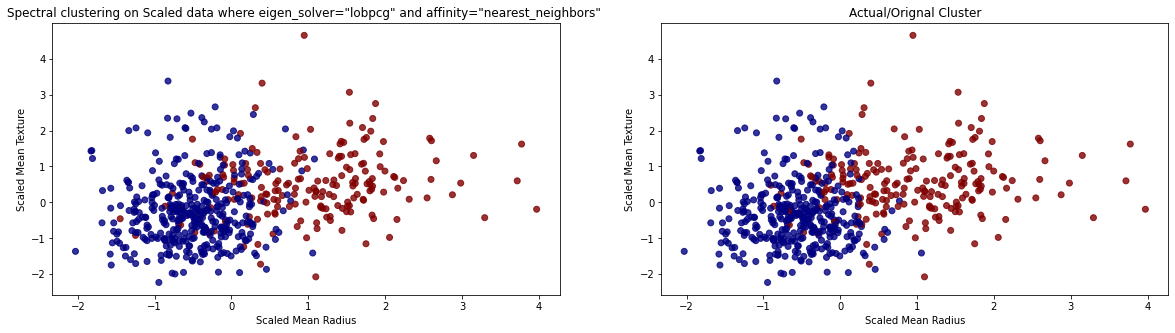

In [12]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=models['ypred_SC_2_eigen_affinity_scaled'], cmap = "jet_r",alpha=0.8)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Spectral clustering on Scaled data where eigen_solver=\"lobpcg\" and affinity=\"nearest_neighbors\" ')

plt.subplot(122)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

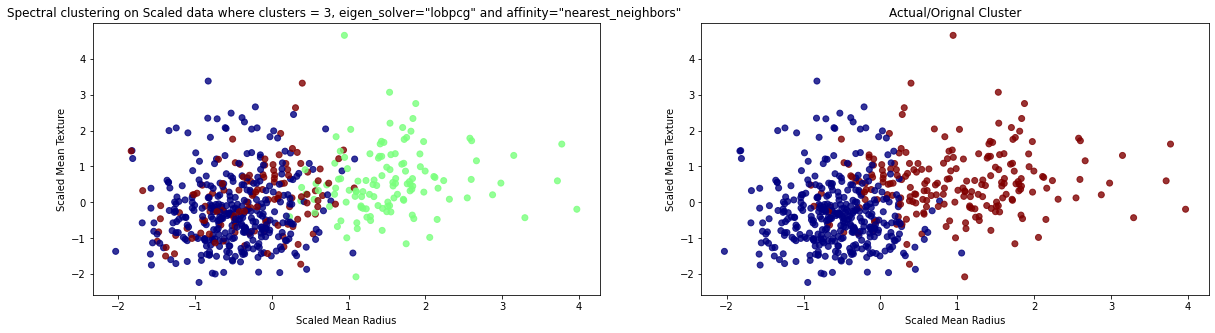

In [13]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=models['ypred_SC_3_eigen_affinity_scaled'], cmap = "jet_r",alpha=0.8)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Spectral clustering on Scaled data where clusters = 3, eigen_solver=\"lobpcg\" and affinity=\"nearest_neighbors\" ')

plt.subplot(122)
plt.scatter(X_scaled[:,0],X_scaled[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Scaled Mean Radius')
plt.ylabel('Scaled Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

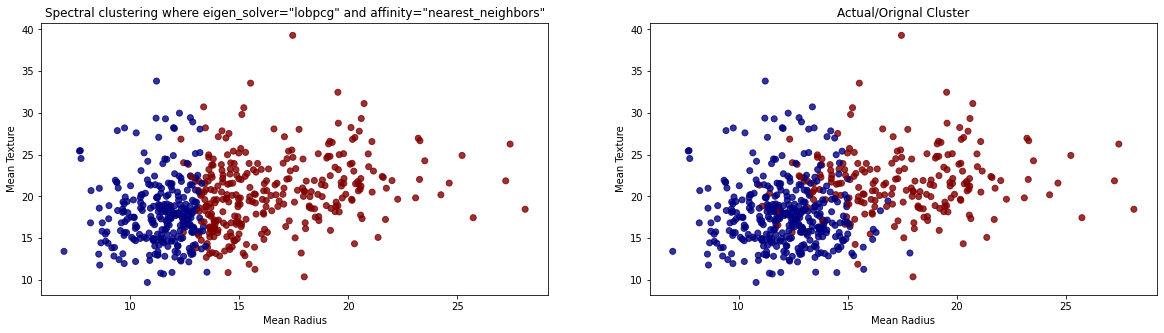

In [14]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.scatter(X[:,0],X[:,1],  c=models['ypred_SC_2_eigen_affinity_normal'], cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Spectral clustering where eigen_solver=\"lobpcg\" and affinity=\"nearest_neighbors\"')


plt.subplot(122)
plt.scatter(X[:,0],X[:,1],  c=y, cmap = "jet_r",alpha=0.8)
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.title('Actual/Orignal Cluster')
plt.show()

In [15]:
## New data frame to get the all the accuracy metrics for some of the best parameters

In [16]:
best_models = ['SC_2_eigen_affinity_normal','SC_2_affinity_scaled','SC_3_eigen_affinity_scaled','SC_2_eigen_affinity_scaled','SC_2_affinity_normal']

In [17]:
final_scoring_metrics = {}
for model in best_models:
  list=[]
  labels = models['ypred_'+model]
  for i in range(len(estimators)):
    if (estimators[i][0] in model):
      list.append(str(estimators[i][1]).split('g',1)[1])
      break
  if ('3' not in model):
    list.append((labels == y).sum())
  else:
    list.append('-')
  if ('scaled' in model):
    list.append(np.round(metrics.calinski_harabasz_score(X_scaled, labels),4))
    list.append(np.round(metrics.silhouette_score(X_scaled, labels, metric='euclidean'),4))
    list.append(np.round(metrics.davies_bouldin_score(X_scaled, labels),4))
  else:
    list.append(np.round(metrics.calinski_harabasz_score(X, labels),4))
    list.append(np.round(metrics.silhouette_score(X, labels, metric='euclidean'),4))
    list.append(np.round(metrics.davies_bouldin_score(X, labels),4))  
  list.append(np.round(metrics.homogeneity_score(y, labels),4))
  list.append(np.round(metrics.fowlkes_mallows_score(y, labels),4))
  list.append(np.round(metrics.completeness_score(y, labels),4))
  list.append(np.round(metrics.v_measure_score(y,labels),4))
  list.append(np.round(metrics.rand_score(y,labels),4))
  list.append(np.round(metrics.adjusted_rand_score(y,labels),4))
  final_scoring_metrics[model] = list

In [18]:
final_columns = ['parameters','Correct predictions','Calinski Harbaz Score','Sillhouette Score','Davies Bouldin Score','Homogeneity Score',
                 'Fowlkes Mallows Score','Completness Score','V measure Score','Rand Score','Adjusted Rand Score']

In [19]:
df1=pd.DataFrame(final_scoring_metrics,index=final_columns)
df1.T.sort_values(['Adjusted Rand Score']) 

,parameters,Correct predictions,Calinski Harbaz Score,Sillhouette Score,Davies Bouldin Score,Homogeneity Score,Fowlkes Mallows Score,Completness Score,V measure Score,Rand Score,Adjusted Rand Score
SC_2_eigen_affinity_normal,"(affinity='nearest_neighbors', eigen_solver='l...",469,445.0169,0.4065,0.7419,0.427,0.7192,0.4077,0.4171,0.7098,0.4195
SC_2_affinity_normal,"(affinity='nearest_neighbors', n_clusters=2)",469,445.0169,0.4065,0.7419,0.427,0.7192,0.4077,0.4171,0.7098,0.4195
SC_3_eigen_affinity_scaled,(n_clusters=3),-,192.0368,0.2862,1.5721,0.5613,0.7525,0.3801,0.4533,0.7594,0.5236
SC_2_affinity_scaled,"(affinity='nearest_neighbors', n_clusters=2)",36,259.6634,0.3367,1.3161,0.6497,0.8911,0.6762,0.6627,0.8813,0.7608
SC_2_eigen_affinity_scaled,"(affinity='nearest_neighbors', eigen_solver='l...",533,259.6634,0.3367,1.3161,0.6497,0.8911,0.6762,0.6627,0.8813,0.7608
